# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [36]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [38]:
#1 . The target variables is "fraud" and it is a categorical distribution. Yes we can say we are dealing with an imbalanced dataset

In [39]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

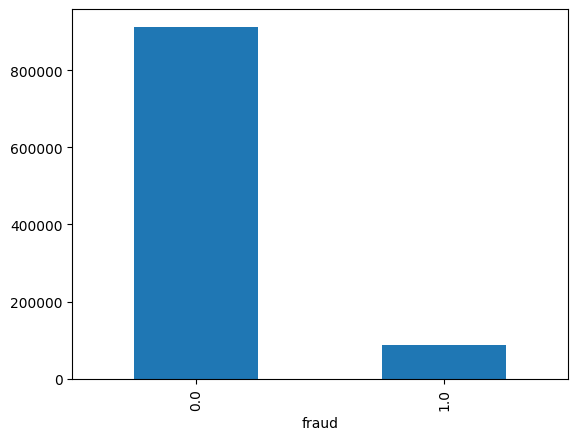

In [40]:
fraud_number = df["fraud"].value_counts()
fraud_number.plot(kind="bar")
plt.show()

In [41]:
features = df.drop(columns = ["fraud"])
target = df["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
log_reg = LogisticRegression()

In [44]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [45]:
log_reg.score(X_test_scaled, y_test)

0.958344

In [46]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    227932
         1.0       0.89      0.60      0.72     22068

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



#### Oversampling

In [47]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values

fraud = train[train["fraud"] == 1]
not_fraud = train[train["fraud"] == 0]

yes_df_oversampled = resample(fraud,
                                replace=True,
                                n_samples = len(not_fraud),
                                random_state=0)

not_fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.038910,-0.186465,0.126874,0.366347,1.359641,-0.335079,0.731603,0.0
1,-0.019609,0.300986,-0.476212,0.366347,1.359641,-0.335079,-1.366861,0.0
2,-0.172832,-0.008942,-0.409130,0.366347,1.359641,-0.335079,0.731603,0.0
3,-0.246989,-0.164927,-0.399364,0.366347,1.359641,-0.335079,-1.366861,0.0
4,-0.362202,-0.176249,0.027776,0.366347,-0.735488,-0.335079,0.731603,0.0


In [48]:
train_over = pd.concat([yes_df_oversampled, not_fraud])
train_over

X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [49]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227932
         1.0       0.58      0.95      0.72     22068

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



### Undersampled

In [50]:
no_df_undersampled = resample(not_fraud,
                                replace=True,
                                n_samples = len(fraud),
                                random_state=0)
no_df_undersampled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
334898,-0.351680,-0.186720,-0.142435,0.366347,1.359641,-0.335079,0.731603,0.0
477378,-0.405037,-0.186804,-0.231447,-2.729650,-0.735488,-0.335079,0.731603,0.0
129119,-0.368182,-0.183899,0.315136,0.366347,-0.735488,2.984373,0.731603,0.0
166733,0.149755,0.085250,-0.282555,0.366347,-0.735488,-0.335079,0.731603,0.0
394031,0.102595,-0.181400,-0.494438,0.366347,-0.735488,-0.335079,0.731603,0.0


In [51]:
train_under = pd.concat([no_df_undersampled, fraud])

X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [52]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\Amira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227932
         1.0       0.58      0.95      0.72     22068

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



### SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [57]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227932
         1.0       0.57      0.95      0.72     22068

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

